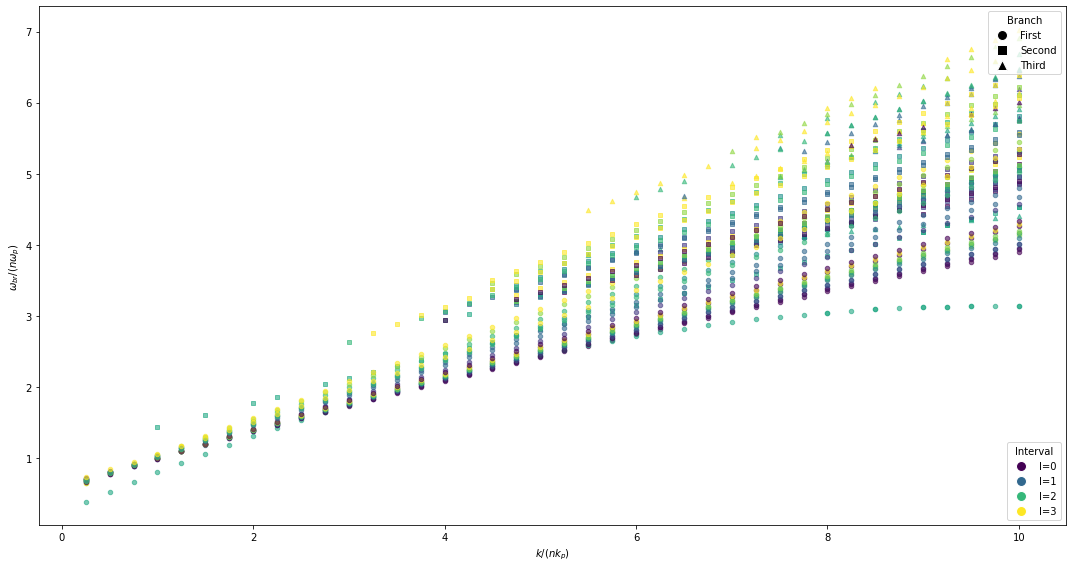

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Definir los diferentes casos excluyendo temporalmente kpHs=0p08 y uoc=0p25
kpHs_values = ['0p08', '0p16']
uoc_values = ['0p25', '0p50']

# Función para cargar datos desde un archivo JSON
def load_data(kpHs, uoc):
    filename = f'/projects/DEIKE/cmartinb/omegas/kpHs{kpHs}_uoc{uoc}.json'
    with open(filename, 'r') as f:
        data_dict = json.load(f)
    return data_dict

# Inicializar diccionarios para almacenar los datos
all_data = {}

for kpHs in kpHs_values:
    for uoc in uoc_values:
        key = f'kpHs{kpHs}_uoc{uoc}'
        all_data[key] = load_data(kpHs, uoc)

# Configuración de gráficos
symbols = ['o', 's', '^']
labels = ['First', 'Second', 'Third']

fig, ax = plt.subplots(figsize=(15, 8))

# Iterar sobre cada caso y graficar
for key, data in all_data.items():
    k_values_first = np.array(data['k_values_first'])
    differences_first = np.array(data['differences_first'])
    omega_values_first = np.array(data['omega_values_first'])
    normalized_omega_first = np.abs(np.array(data['normalized_omega_first']))
    normalized_differences_first = np.abs(np.array(data['normalized_differences_first']))
    interval_indices_first = np.array(data['interval_indices_first'])

    k_values_second = np.array(data['k_values_second'])
    differences_second = np.array(data['differences_second'])
    omega_values_second = np.array(data['omega_values_second'])
    normalized_omega_second = np.abs(np.array(data['normalized_omega_second']))
    normalized_differences_second = np.abs(np.array(data['normalized_differences_second']))
    interval_indices_second = np.array(data['interval_indices_second'])

    k_values_third = np.array(data['k_values_third'])
    differences_third = np.array(data['differences_third'])
    omega_values_third = np.array(data['omega_values_third'])
    normalized_omega_third = np.abs(np.array(data['normalized_omega_third']))
    normalized_differences_third = np.abs(np.array(data['normalized_differences_third']))
    interval_indices_third = np.array(data['interval_indices_third'])
    
    num_intervals = max(max(interval_indices_first, default=-1), max(interval_indices_second, default=-1), max(interval_indices_third, default=-1)) + 1
    interval_colors = plt.cm.viridis(np.linspace(0, 1, num_intervals))
    
    for i in range(num_intervals):
        idx_first = interval_indices_first == i
        idx_second = interval_indices_second == i
        idx_third = interval_indices_third == i
        
        if np.any(idx_first):
            k_first = k_values_first[idx_first]
            ax.scatter(k_first, normalized_omega_first[idx_first], marker=symbols[0], s=20, color=interval_colors[i], alpha=0.6, label=f'{key} First' if i == 0 else "")
        
        if np.any(idx_second):
            k_second = k_values_second[idx_second]
            ax.scatter(k_second, normalized_omega_second[idx_second], marker=symbols[1], s=20, color=interval_colors[i], alpha=0.6, label=f'{key} Second' if i == 0 else "")
        
        if np.any(idx_third):
            k_third = k_values_third[idx_third]
            ax.scatter(k_third, normalized_omega_third[idx_third], marker=symbols[2], s=20, color=interval_colors[i], alpha=0.6, label=f'{key} Third' if i == 0 else "")

# Añadir la relación de dispersión teórica para el agua
'''
g = 9.81
rho = 1
sigma = (1 - 1.25 * 10**(-3)) / (200*4**2)
k_diss = np.linspace(0, 40, 200)
dispersion_relation = np.sqrt(k_diss * g)
dispersion_relation_tension = np.sqrt(k_diss * g + sigma/rho * k_diss**3)
ax.plot(k_diss / 4, dispersion_relation / omegap, ':', lw=0.5, c='black', label=r"$\omega= \sqrt{gk}$")
ax.plot(k_diss / 4, dispersion_relation_tension / omegap, '--', lw=0.5, c='black', label=r"$\omega= \sqrt{gk + \sigma/\rho k^3}$")
'''
ax.set_xlabel(r'$k/(nk_{p})$')
ax.set_ylabel(r'$ \omega_{br} /(n\omega_{p})$')

# Añadir leyendas
first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='upper right', title='Branch')
ax.add_artist(first_legend)

# Leyenda para los intervalos
unique_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=interval_colors[i], markersize=10) for i in range(num_intervals)]
interval_labels = [f'I={i}' for i in range(num_intervals)]
ax.legend(unique_handles, interval_labels, loc='lower right', title='Interval')

plt.tight_layout()
plt.savefig(f'/projects/DEIKE/cmartinb/graphs/branches_normalized_comparison.png')
plt.show()


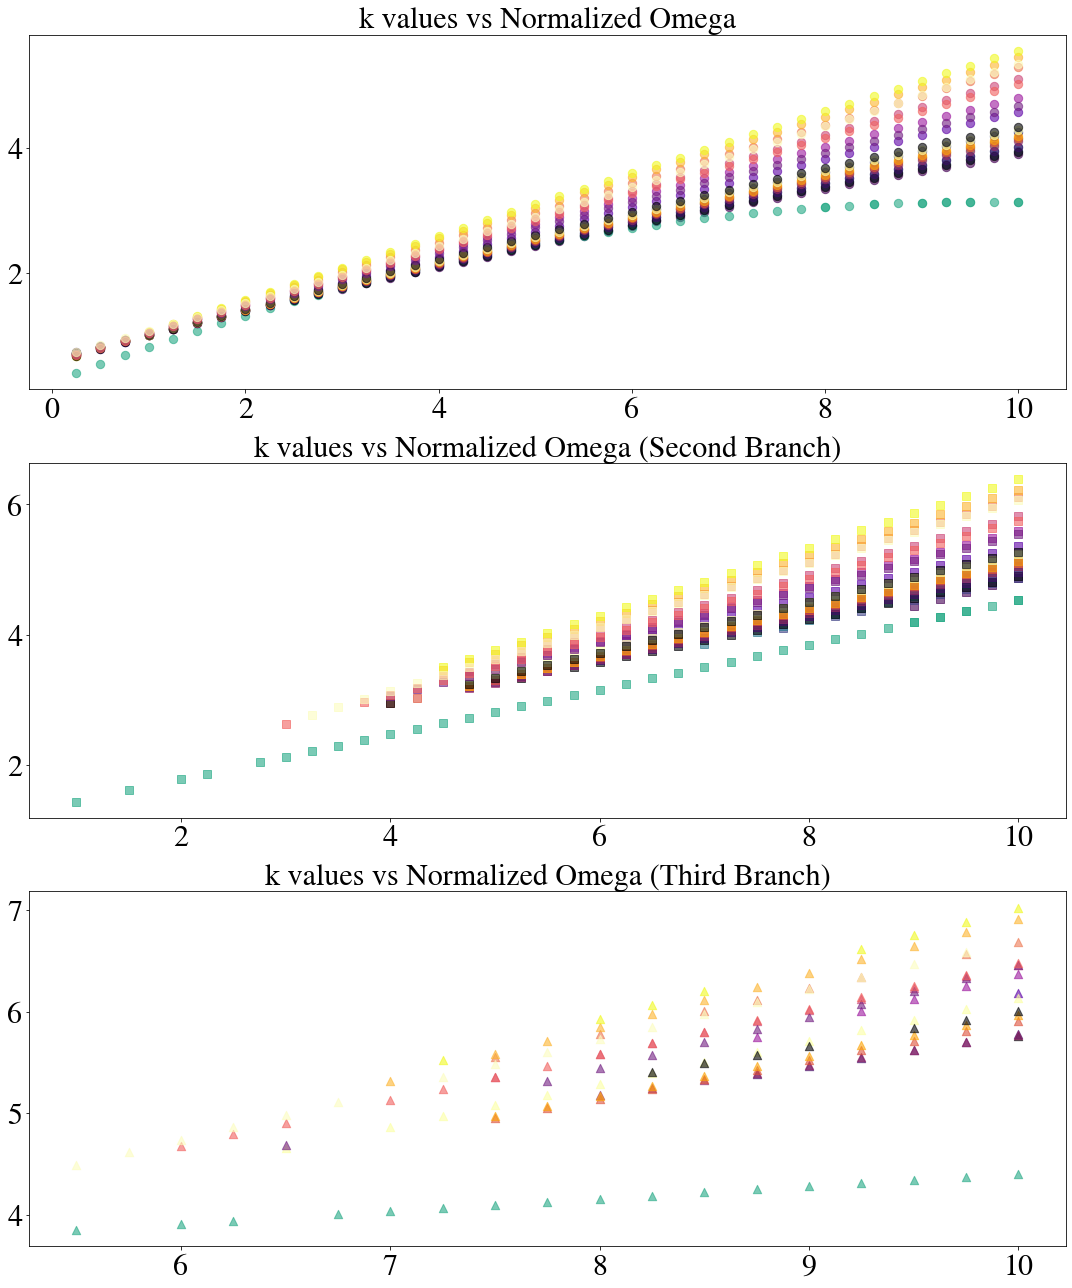

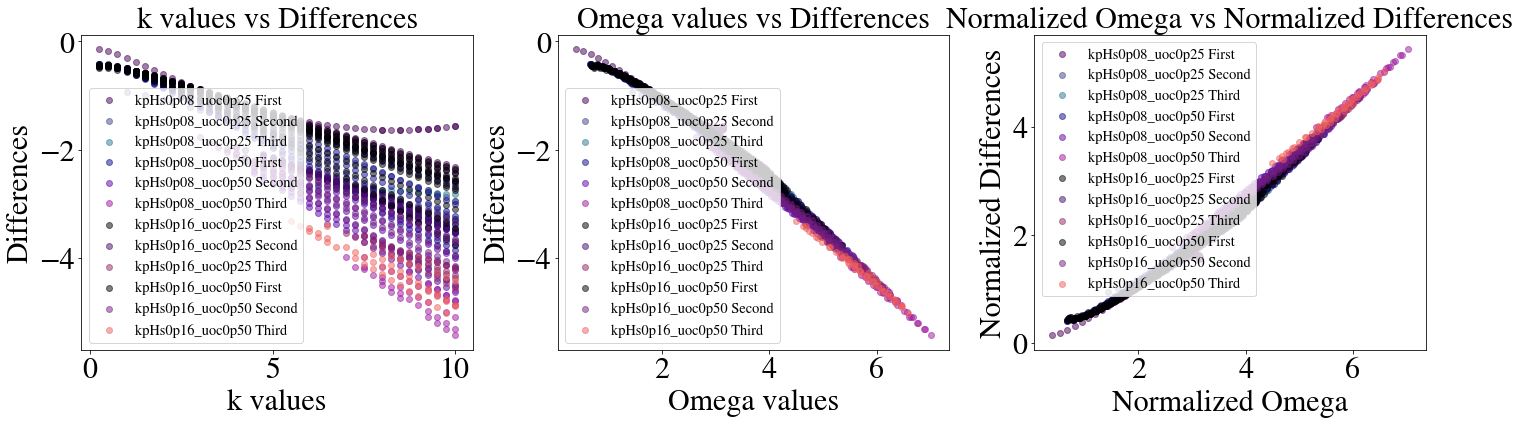

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pylab

# Configuración de gráficos
params = {
    'legend.fontsize': 'x-Large',
    'figure.figsize': (15, 6),
    'axes.labelsize': 30,
    'axes.titlesize': 30,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'font.family': 'STIXGeneral',
    'axes.titleweight': 'normal',
    'axes.labelweight': 'normal',
    'text.usetex': False,  # Enable LaTeX rendering
}

plt.rcParams.update(params)
pylab.rcParams.update(params)

# Definir los diferentes casos
kpHs_values = ['0p08', '0p16']
uoc_values = ['0p25', '0p50']
color_maps = ['viridis', 'plasma', 'inferno', 'magma']

# Función para cargar datos desde un archivo JSON
def load_data(kpHs, uoc):
    filename = f'/projects/DEIKE/cmartinb/omegas/kpHs{kpHs}_uoc{uoc}.json'
    with open(filename, 'r') as f:
        data_dict = json.load(f)
    return data_dict

# Inicializar diccionarios para almacenar los datos
all_data = {}

for kpHs in kpHs_values:
    for uoc in uoc_values:
        key = f'kpHs{kpHs}_uoc{uoc}'
        all_data[key] = load_data(kpHs, uoc)

# Configuración de gráficos
symbols = ['o', 's', '^']
labels = ['First', 'Second', 'Third']

# Crear gráficos para comparar los diferentes casos en una sola figura
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

plot_idx = 0

for idx, (key, data) in enumerate(all_data.items()):
    cmap = plt.get_cmap(color_maps[idx % len(color_maps)])
    
    k_values_first = np.array(data['k_values_first'])
    differences_first = np.array(data['differences_first'])
    omega_values_first = np.array(data['omega_values_first'])
    normalized_omega_first = np.abs(np.array(data['normalized_omega_first']))
    normalized_differences_first = np.abs(np.array(data['normalized_differences_first']))
    interval_indices_first = np.array(data['interval_indices_first'])

    k_values_second = np.array(data['k_values_second'])
    differences_second = np.array(data['differences_second'])
    omega_values_second = np.array(data['omega_values_second'])
    normalized_omega_second = np.abs(np.array(data['normalized_omega_second']))
    normalized_differences_second = np.abs(np.array(data['normalized_differences_second']))
    interval_indices_second = np.array(data['interval_indices_second'])

    k_values_third = np.array(data['k_values_third'])
    differences_third = np.array(data['differences_third'])
    omega_values_third = np.array(data['omega_values_third'])
    normalized_omega_third = np.abs(np.array(data['normalized_omega_third']))
    normalized_differences_third = np.abs(np.array(data['normalized_differences_third']))
    interval_indices_third = np.array(data['interval_indices_third'])

    num_intervals = max(max(interval_indices_first, default=-1), max(interval_indices_second, default=-1), max(interval_indices_third, default=-1)) + 1
    interval_colors = cmap(np.linspace(0, 1, num_intervals))

    for i in range(num_intervals):
        idx_first = interval_indices_first == i
        idx_second = interval_indices_second == i
        idx_third = interval_indices_third == i

        if np.any(idx_first):
            k_first = k_values_first[idx_first]
            axes[0].scatter(k_first, normalized_omega_first[idx_first], marker=symbols[0], s=70, color=interval_colors[i], alpha=0.6, label=f'{key} First' if plot_idx == 0 else "")

        if np.any(idx_second):
            k_second = k_values_second[idx_second]
            axes[1].scatter(k_second, normalized_omega_second[idx_second], marker=symbols[1], s=70, color=interval_colors[i], alpha=0.6, label=f'{key} Second' if plot_idx == 0 else "")

        if np.any(idx_third):
            k_third = k_values_third[idx_third]
            axes[2].scatter(k_third, normalized_omega_third[idx_third], marker=symbols[2], s=70, color=interval_colors[i], alpha=0.6, label=f'{key} Third' if plot_idx == 0 else "")

    plot_idx += 1
'''
# Añadir la relación de dispersión teórica para el agua a cada gráfico
g = 9.81
rho = 1
sigma = (1 - 1.25 * 10**(-3)) / (200*4**2)
k_diss = np.linspace(0, 40, 200)
dispersion_relation = np.sqrt(k_diss * g)
dispersion_relation_tension = np.sqrt(k_diss * g + sigma/rho * k_diss**3)

for ax in axes:
    ax.plot(k_diss / 4, dispersion_relation / omegap, ':', lw=2, c='black', label=r"$\omega= \sqrt{gk}$")
    ax.plot(k_diss / 4, dispersion_relation_tension / omegap, '--', lw=2, c='black', label=r"$\omega= \sqrt{gk + \sigma/\rho k^3}$")
    ax.set_xlabel(r'$k/(nk_{p})$')
    ax.set_ylabel(r'$ \omega_{br} /(n\omega_{p})$')
    ax.legend(loc='upper right', fontsize=14)
'''
axes[0].set_title('k values vs Normalized Omega')
axes[1].set_title('k values vs Normalized Omega (Second Branch)')
axes[2].set_title('k values vs Normalized Omega (Third Branch)')

plt.tight_layout()
plt.savefig('/projects/DEIKE/cmartinb/graphs/branches_normalized_comparison_all_cases.png')
plt.show()

# Graficar las diferencias como se hacía antes pero en tres gráficos consecutivos

# Gráfico para k_values vs differences
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
for idx, (key, data) in enumerate(all_data.items()):
    cmap = plt.get_cmap(color_maps[idx % len(color_maps)])
    num_intervals = max(max(data['interval_indices_first'], default=-1), max(data['interval_indices_second'], default=-1), max(data['interval_indices_third'], default=-1)) + 1
    interval_colors = cmap(np.linspace(0, 1, num_intervals))
    
    plt.scatter(data['k_values_first'], data['differences_first'], label=f'{key} First', alpha=0.5, color=interval_colors[0])
    plt.scatter(data['k_values_second'], data['differences_second'], label=f'{key} Second', alpha=0.5, color=interval_colors[1])
    plt.scatter(data['k_values_third'], data['differences_third'], label=f'{key} Third', alpha=0.5, color=interval_colors[2])
plt.xlabel('k values')
plt.ylabel('Differences')
plt.title('k values vs Differences')
plt.legend()

# Gráfico para omega_values vs differences
plt.subplot(1, 3, 2)
for idx, (key, data) in enumerate(all_data.items()):
    cmap = plt.get_cmap(color_maps[idx % len(color_maps)])
    num_intervals = max(max(data['interval_indices_first'], default=-1), max(data['interval_indices_second'], default=-1), max(data['interval_indices_third'], default=-1)) + 1
    interval_colors = cmap(np.linspace(0, 1, num_intervals))
    
    plt.scatter(data['omega_values_first'], data['differences_first'], label=f'{key} First', alpha=0.5, color=interval_colors[0])
    plt.scatter(data['omega_values_second'], data['differences_second'], label=f'{key} Second', alpha=0.5, color=interval_colors[1])
    plt.scatter(data['omega_values_third'], data['differences_third'], label=f'{key} Third', alpha=0.5, color=interval_colors[2])
plt.xlabel('Omega values')
plt.ylabel('Differences')
plt.title('Omega values vs Differences')
plt.legend()

# Gráfico para normalized_omega vs normalized_differences
plt.subplot(1, 3, 3)
for idx, (key, data) in enumerate(all_data.items()):
    cmap = plt.get_cmap(color_maps[idx % len(color_maps)])
    num_intervals = max(max(data['interval_indices_first'], default=-1), max(data['interval_indices_second'], default=-1), max(data['interval_indices_third'], default=-1)) + 1
    interval_colors = cmap(np.linspace(0, 1, num_intervals))
    
    plt.scatter(data['normalized_omega_first'], data['normalized_differences_first'], label=f'{key} First', alpha=0.5, color=interval_colors[0])
    plt.scatter(data['normalized_omega_second'], data['normalized_differences_second'], label=f'{key} Second', alpha=0.5, color=interval_colors[1])
    plt.scatter(data['normalized_omega_third'], data['normalized_differences_third'], label=f'{key} Third', alpha=0.5, color=interval_colors[2])
plt.xlabel('Normalized Omega')
plt.ylabel('Normalized Differences')
plt.title('Normalized Omega vs Normalized Differences')
plt.legend()

plt.tight_layout()
plt.savefig('/projects/DEIKE/cmartinb/graphs/comparative_differences.png')
plt.show()


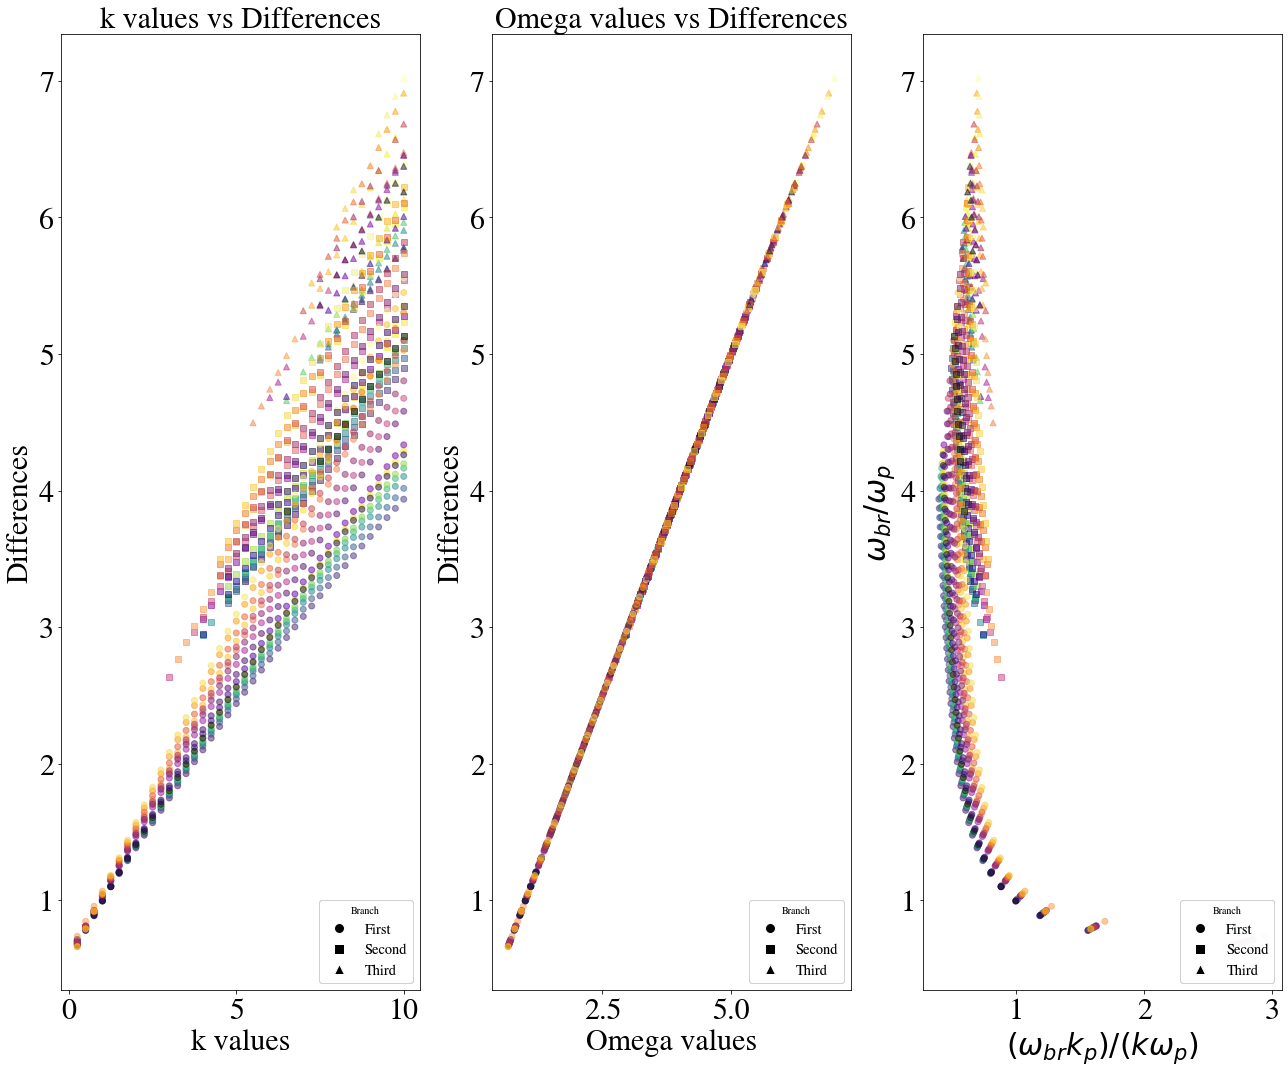

In [19]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Definir los diferentes casos
kpHs_values = ['0p16']
uoc_values = ['0p25', '0p50']

# Función para cargar datos desde un archivo JSON
def load_data(kpHs, uoc):
    filename = f'/projects/DEIKE/cmartinb/omegas/kpHs{kpHs}_uoc{uoc}.json'
    with open(filename, 'r') as f:
        data_dict = json.load(f)
    return data_dict

# Inicializar diccionarios para almacenar los datos
all_data = {}

for kpHs in kpHs_values:
    for uoc in uoc_values:
        key = f'kpHs{kpHs}_uoc{uoc}'
        all_data[key] = load_data(kpHs, uoc)

# Agregar de nuevo kpHs = 0p08 y uoc = 0p50
kpHs_values.append('0p08')

for kpHs in ['0p08']:
    for uoc in ['0p50']:
        key = f'kpHs{kpHs}_uoc{uoc}'
        all_data[key] = load_data(kpHs, uoc)

# Configuración de color maps y símbolos
color_maps = ['viridis', 'plasma', 'inferno', 'magma']
symbols = ['o', 's', '^']

# Crear gráficos para comparar los diferentes casos
fig, axes = plt.subplots(1, 3, figsize=(18, 15))

# Gráfico para k_values vs differences
ax = axes[0]
for idx, (key, data) in enumerate(all_data.items()):
    cmap = plt.get_cmap(color_maps[idx % len(color_maps)])
    colors_first = cmap(np.linspace(0, 1, len(data['k_values_first'])))
    colors_second = cmap(np.linspace(0, 1, len(data['k_values_second'])))
    colors_third = cmap(np.linspace(0, 1, len(data['k_values_third'])))
    ax.scatter(data['k_values_first'], data['normalized_omega_first'], label=f'{key} First', alpha=0.5, color=colors_first, marker=symbols[0])
    ax.scatter(data['k_values_second'], data['normalized_omega_second'], label=f'{key} Second', alpha=0.5, color=colors_second, marker=symbols[1])
    ax.scatter(data['k_values_third'], data['normalized_omega_third'], label=f'{key} Third', alpha=0.5, color=colors_third, marker=symbols[2])
ax.set_xlabel('k values')
ax.set_ylabel('Differences')
ax.set_title('k values vs Differences')
first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='lower right', title='Branch')
ax.add_artist(first_legend)

# Gráfico para omega_values vs differences
ax = axes[1]
for idx, (key, data) in enumerate(all_data.items()):
    cmap = plt.get_cmap(color_maps[idx % len(color_maps)])
    colors_first = cmap(np.linspace(0, 1, len(data['omega_values_first'])))
    colors_second = cmap(np.linspace(0, 1, len(data['omega_values_second'])))
    colors_third = cmap(np.linspace(0, 1, len(data['omega_values_third'])))
    ax.scatter(data['omega_values_first'], data['normalized_omega_first'], label=f'{key} First', alpha=0.5, color=colors_first, marker=symbols[0])
    ax.scatter(data['omega_values_second'], data['normalized_omega_second'], label=f'{key} Second', alpha=0.5, color=colors_second, marker=symbols[1])
    ax.scatter(data['omega_values_third'], data['normalized_omega_third'], label=f'{key} Third', alpha=0.5, color=colors_third, marker=symbols[2])
ax.set_xlabel('Omega values')
ax.set_ylabel('Differences')
ax.set_title('Omega values vs Differences')
first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='lower right', title='Branch')
ax.add_artist(first_legend)

# Gráfico para normalized_omega vs normalized_differences
ax = axes[2]
for idx, (key, data) in enumerate(all_data.items()):
    cmap = plt.get_cmap(color_maps[idx % len(color_maps)])
    colors_first = cmap(np.linspace(0, 1, len(data['normalized_omega_first'])))
    colors_second = cmap(np.linspace(0, 1, len(data['normalized_omega_second'])))
    colors_third = cmap(np.linspace(0, 1, len(data['normalized_omega_third'])))
    omega_first = np.array(data['omega_values_first'])
    k_first = np.array(data['k_values_first'])
    omega_second = np.array(data['omega_values_second'])
    k_second = np.array(data['k_values_second'])
    omega_third = np.array(data['omega_values_third'])
    k_third = np.array(data['k_values_third'])
    ax.scatter(omega_first/k_first, data['normalized_omega_first'], label=f'{key} First', alpha=0.5, color=colors_first, marker=symbols[0])
    ax.scatter(omega_second/k_second, data['normalized_omega_second'], label=f'{key} Second', alpha=0.5, color=colors_second, marker=symbols[1])
    ax.scatter(omega_third/k_third, data['normalized_omega_third'], label=f'{key} Third', alpha=0.5, color=colors_third, marker=symbols[2])
ax.set_xlabel(r'$(\omega_{br} k_{p})/(k \omega_{p})$')
ax.set_ylabel(r'$\omega_{br}/\omega_{p}$')
ax.legend()


first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='lower right', title='Branch')
ax.add_artist(first_legend)
#unique_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=interval_colors[i], markersize=10) for i in range(num_intervals)]
#ax.legend(unique_handles, interval_ranges, loc='upper left', title='Interval')

plt.tight_layout()
plt.show()


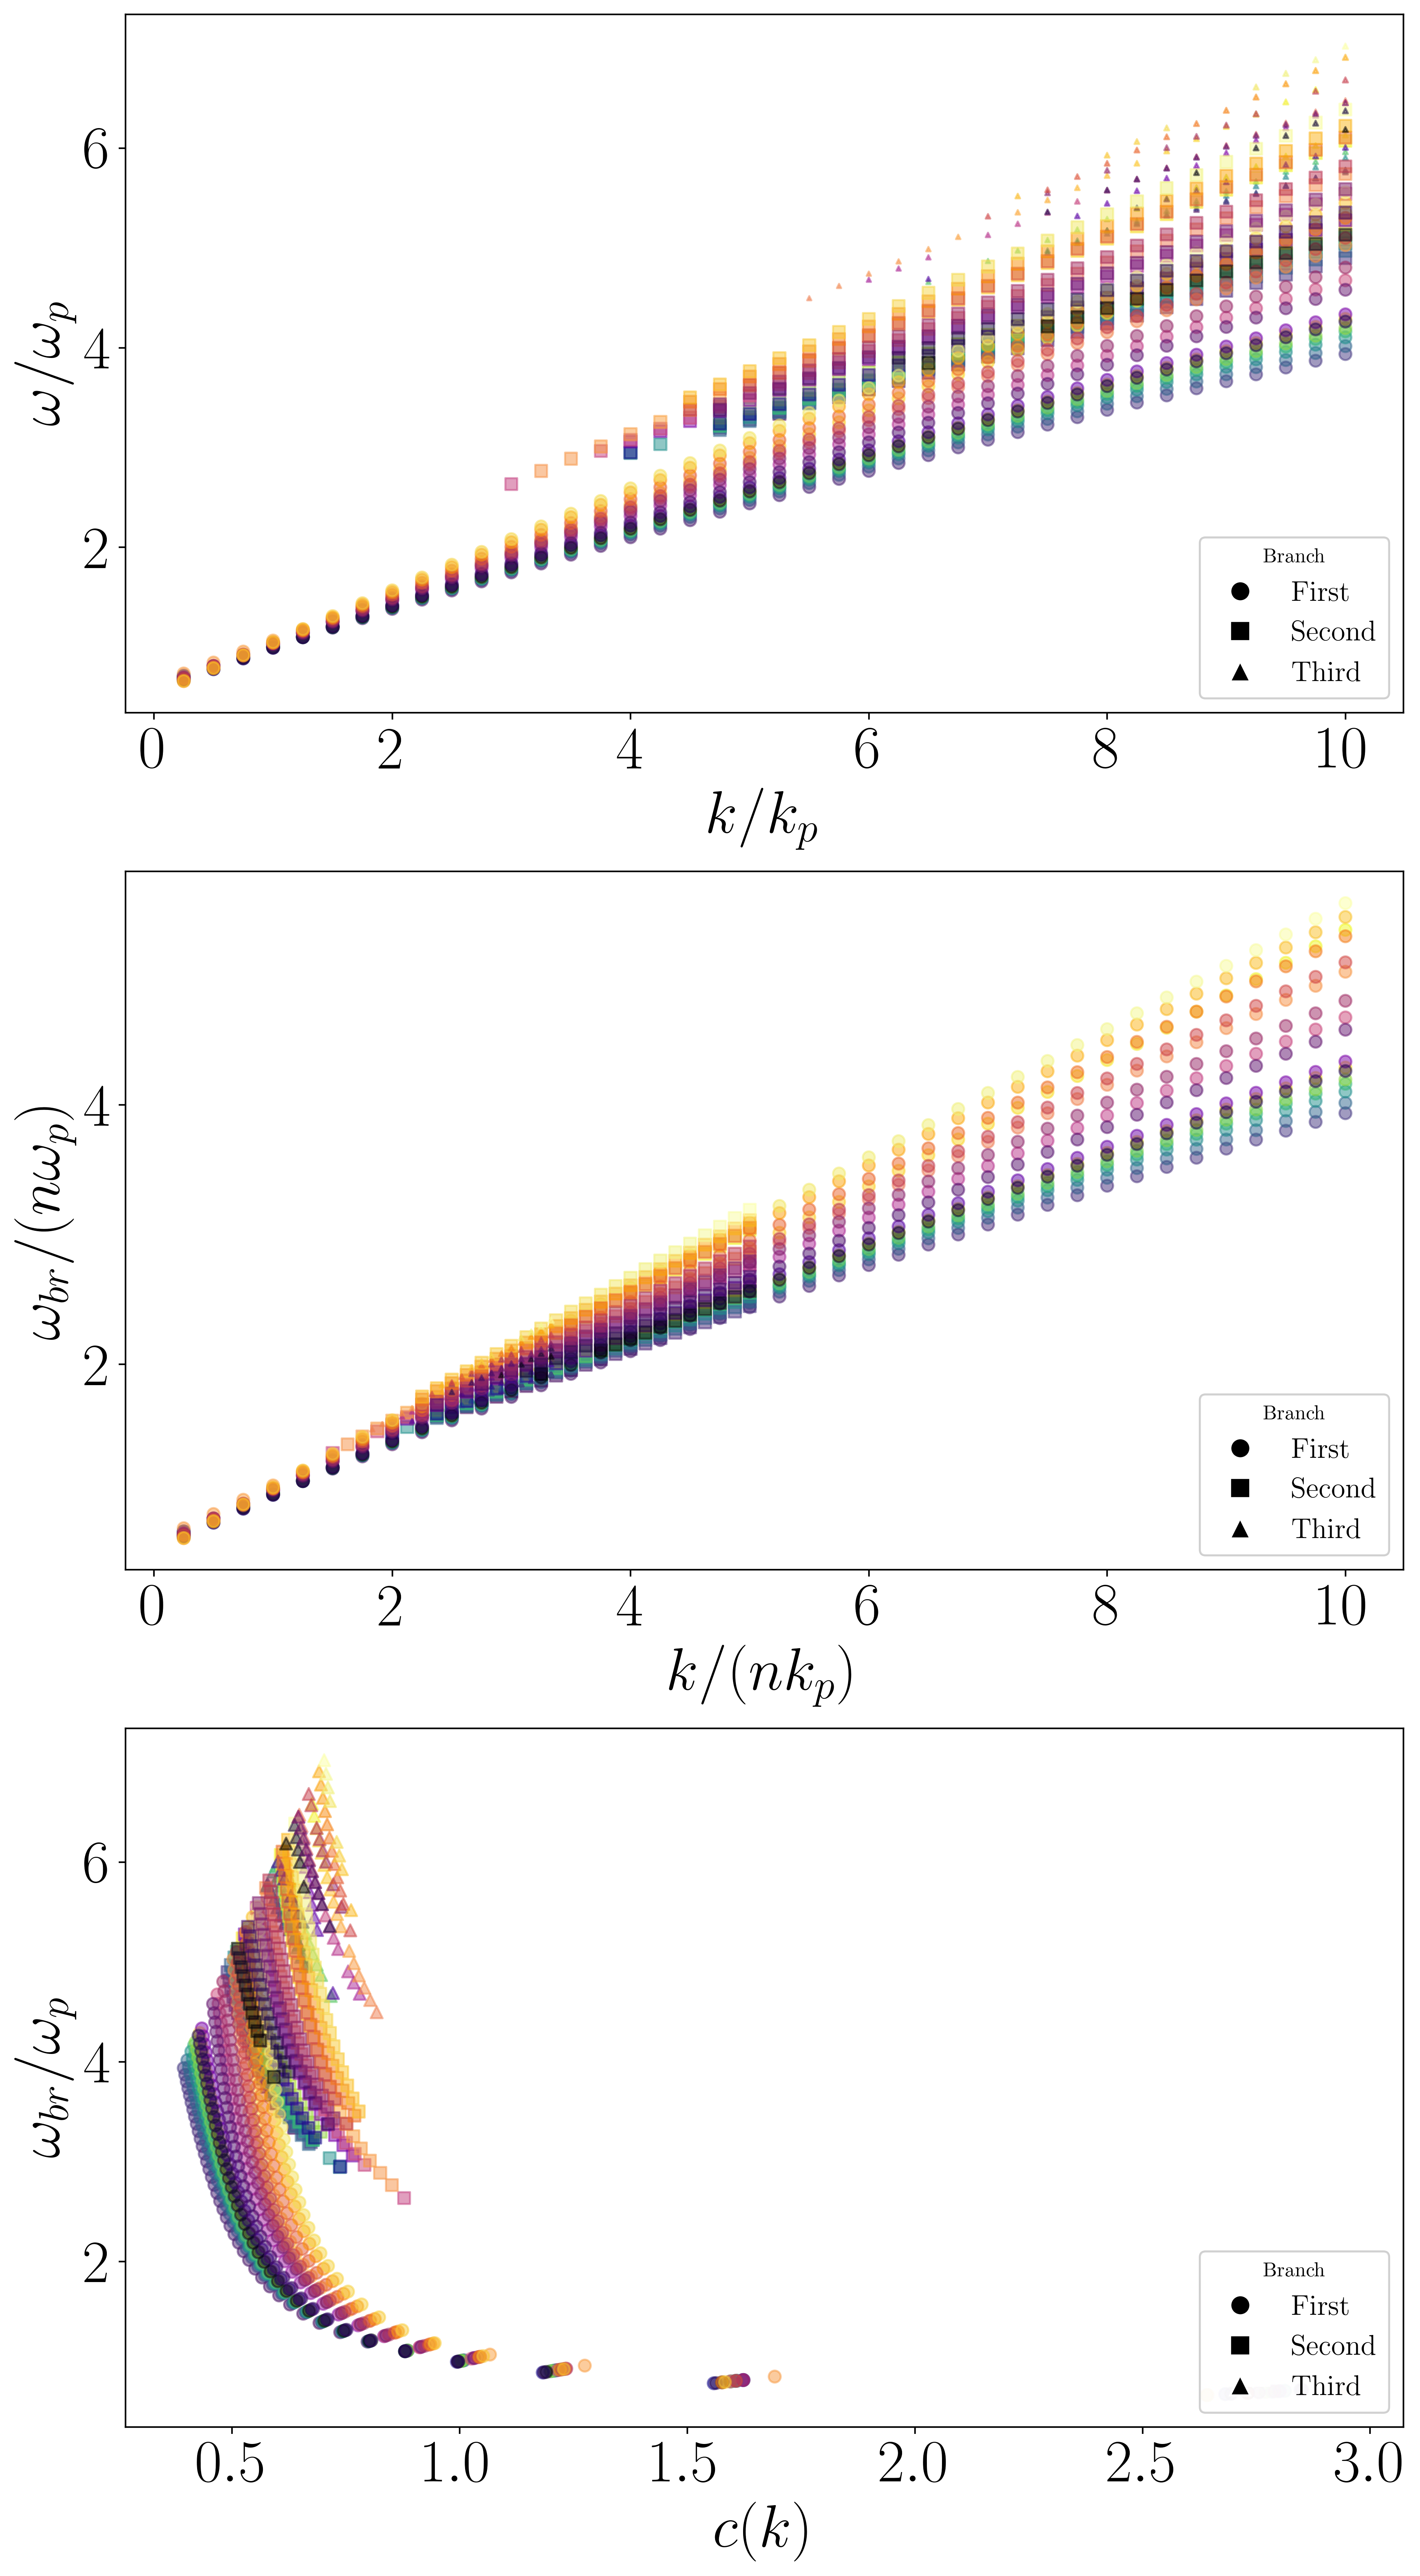

In [30]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Configuración de gráficos
params = {
    'legend.fontsize': 'x-Large',
    'figure.figsize': (15, 6),
    'axes.labelsize': 30,
    'axes.titlesize': 30,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'font.family': 'STIXGeneral',
    'axes.titleweight': 'normal',
    'axes.labelweight': 'normal',
    'text.usetex': True,  # Enable LaTeX rendering
}

plt.rcParams.update(params)
pylab.rcParams.update(params)

# Definir los diferentes casos
kpHs_values = ['0p16']
uoc_values = ['0p25', '0p50']

# Función para cargar datos desde un archivo JSON
def load_data(kpHs, uoc):
    filename = f'/projects/DEIKE/cmartinb/omegas/kpHs{kpHs}_uoc{uoc}.json'
    with open(filename, 'r') as f:
        data_dict = json.load(f)
    return data_dict

# Inicializar diccionarios para almacenar los datos
all_data = {}

for kpHs in kpHs_values:
    for uoc in uoc_values:
        key = f'kpHs{kpHs}_uoc{uoc}'
        all_data[key] = load_data(kpHs, uoc)

# Agregar de nuevo kpHs = 0p08 y uoc = 0p50
kpHs_values.append('0p08')

for kpHs in ['0p08']:
    for uoc in ['0p50']:
        key = f'kpHs{kpHs}_uoc{uoc}'
        all_data[key] = load_data(kpHs, uoc)

# Configuración de color maps y símbolos
color_maps = ['viridis', 'plasma', 'inferno', 'cividis']
symbols = ['o', 's', '^']

# Crear gráficos para comparar los diferentes casos
fig, axes = plt.subplots(3, 1, figsize=(10, 18), dpi=400)

# Gráfico para k_values vs differences
ax = axes[0]
for idx, (key, data) in enumerate(all_data.items()):
    cmap = plt.get_cmap(color_maps[idx % len(color_maps)])
    colors_first = cmap(np.linspace(0, 1, len(data['k_values_first'])))
    colors_second = cmap(np.linspace(0, 1, len(data['k_values_second'])))
    colors_third = cmap(np.linspace(0, 1, len(data['k_values_third'])))
    k_first = np.array(data['k_values_first'])
    k_second = np.array(data['k_values_second'])
    k_third = np.array(data['k_values_third'])
    omega_first = np.array(data['normalized_omega_first'])
    omega_second = np.array(data['normalized_omega_second'])
    omega_third = np.array(data['normalized_omega_third'])
    ax.scatter(k_first, data['normalized_omega_first'], label=f'{key} First', alpha=0.5, color=colors_first, marker=symbols[0])
    ax.scatter(k_second, omega_second, label=f'{key} Second', alpha=0.5, color=colors_second, marker=symbols[1])
    ax.scatter(k_third , omega_third, data['normalized_omega_third'], label=f'{key} Third', alpha=0.5, color=colors_third, marker=symbols[2])
ax.set_xlabel(r'$k/k_{p}$')
ax.set_ylabel(r'$\omega/\omega_{p}$')
first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='lower right', title='Branch')
ax.add_artist(first_legend)

# Gráfico para omega_values vs differences
ax = axes[1]
for idx, (key, data) in enumerate(all_data.items()):
    cmap = plt.get_cmap(color_maps[idx % len(color_maps)])
    colors_first = cmap(np.linspace(0, 1, len(data['omega_values_first'])))
    colors_second = cmap(np.linspace(0, 1, len(data['omega_values_second'])))
    colors_third = cmap(np.linspace(0, 1, len(data['omega_values_third'])))
    k_first = np.array(data['k_values_first'])
    k_second = np.array(data['k_values_second'])
    k_third = np.array(data['k_values_third'])
    omega_first = np.array(data['normalized_omega_first'])
    omega_second = np.array(data['normalized_omega_second'])
    omega_third = np.array(data['normalized_omega_third'])
    ax.scatter(k_first, data['normalized_omega_first'], label=f'{key} First', alpha=0.5, color=colors_first, marker=symbols[0])
    ax.scatter(k_second/2, omega_second/2, label=f'{key} Second', alpha=0.5, color=colors_second, marker=symbols[1])
    ax.scatter(k_third/3, omega_third/3, data['normalized_omega_third'], label=f'{key} Third', alpha=0.5, color=colors_third, marker=symbols[2])
ax.set_xlabel(r'$k/(nk_{p})$')
ax.set_ylabel(r'$\omega_{br}/(n\omega_{p})$')
first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='lower right', title='Branch')
ax.add_artist(first_legend)

# Gráfico para normalized_omega vs normalized_differences
ax = axes[2]
for idx, (key, data) in enumerate(all_data.items()):
    cmap = plt.get_cmap(color_maps[idx % len(color_maps)])
    colors_first = cmap(np.linspace(0, 1, len(data['normalized_omega_first'])))
    colors_second = cmap(np.linspace(0, 1, len(data['normalized_omega_second'])))
    colors_third = cmap(np.linspace(0, 1, len(data['normalized_omega_third'])))
    omega_first = np.array(data['omega_values_first'])
    k_first = np.array(data['k_values_first'])
    omega_second = np.array(data['omega_values_second'])
    k_second = np.array(data['k_values_second'])
    omega_third = np.array(data['omega_values_third'])
    k_third = np.array(data['k_values_third'])
    ax.scatter(omega_first/k_first, data['normalized_omega_first'], label=f'{key} First', alpha=0.5, color=colors_first, marker=symbols[0])
    ax.scatter(omega_second/k_second, data['normalized_omega_second'], label=f'{key} Second', alpha=0.5, color=colors_second, marker=symbols[1])
    ax.scatter(omega_third/k_third, data['normalized_omega_third'], label=f'{key} Third', alpha=0.5, color=colors_third, marker=symbols[2])
ax.set_xlabel(r'$c(k)$')
ax.set_ylabel(r'$\omega_{br}/\omega_{p}$')
first_legend = ax.legend([plt.Line2D([0], [0], marker=s, color='w', markerfacecolor='black', markersize=10) for s in symbols], labels, loc='lower right', title='Branch')
ax.add_artist(first_legend)

plt.tight_layout()
plt.show()
